In [339]:
import json
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import copy

numberOfNodes = 100
radiusOfNodes = 1


In [340]:
class vertex:
    def __init__(self, x, y,radius = 1):
        self.x = x
        self.y = y
        self.radius = radius
        self.color = (0,0,0)

def myFunc(v1,v2):
    abs(v2.x, )


    

In [341]:
import math

def line_circle_intersection(x1, y1, x2, y2, cx, cy, r):
    # Calculate line equation parameters
    m = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')  # slope
    b = y1 - m * x1 if x2 != x1 else x1  # y-intercept

    # Check if any of the endpoints are inside the circle
    endpoint1_inside = math.sqrt((x1 - cx)**2 + (y1 - cy)**2) <= r
    endpoint2_inside = math.sqrt((x2 - cx)**2 + (y2 - cy)**2) <= r

    if endpoint1_inside or endpoint2_inside:
        return True  # Line segment intersects or is inside the circle

    # Calculate the distance from the circle center to the line
    distance = abs(cy - m * cx - b) / math.sqrt(1 + m**2)

    # Check if the line segment intersects the circle
    if distance <= r:
        # Check if the intersection point is within the line segment
        x_min, x_max = min(x1, x2), max(x1, x2)
        y_min, y_max = min(y1, y2), max(y1, y2)
        
        if x_min <= cx <= x_max and y_min <= cy <= y_max:
            return True

    return False
def doesCircleLineIntersect(listOfCircles, v1, v2):
    buffer = 10
    for obstruction in listOfCircles:
        cx = listOfCircles[obstruction]["x"]*100
        cy = listOfCircles[obstruction]["y"]*100

        r1 = listOfCircles[obstruction]["r"]*100 +buffer
        if line_circle_intersection(v1.x, v1.y, v2.x, v2.y,cx,cy,r1): 
            return True
    return False
    


In [342]:
def doesConnect(listOfCircles, vert):
    doesConnectBool = False
    x1 = vert.x 
    y1 = vert.y
    for obstruction in listOfCircles:
        x2 = listOfCircles[obstruction]["x"]*100
        y2 = listOfCircles[obstruction]["y"]*100
        r1 = listOfCircles[obstruction]["r"]*100

        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        doesConnectBool = doesConnectBool or (distance <= (r1 + 1))

    # Calculate distance between circle centers
    return doesConnectBool

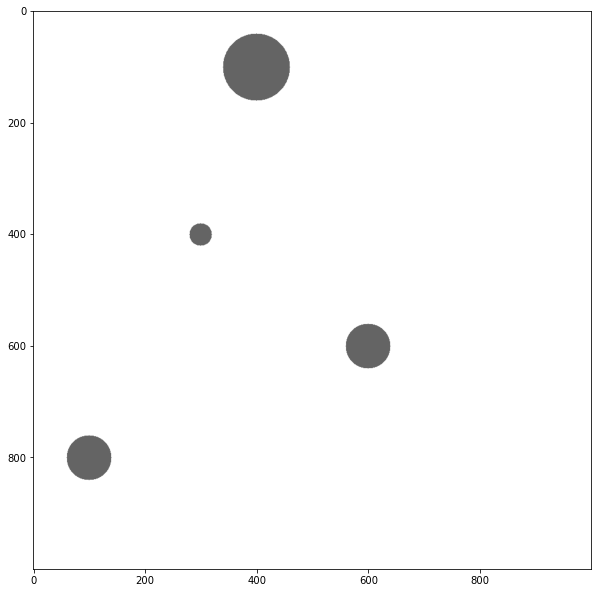

In [343]:
file_path = 'default.json'

with open(file_path, 'r') as file:
    json_list = json.load(file)

white_image = np.ones((1000, 1000, 3), dtype=np.uint8) * 255


for json_object in json_list:
    center = (json_list[json_object]["x"]*100,json_list[json_object]["y"]*100)
    radius = int(json_list[json_object]["r"]*100)
    cv.circle(white_image, center, radius, (100, 100, 100) , thickness=cv.FILLED)

# Generate random coordinates

# #Show the image with matplotlib
plt.figure(figsize=(10, 15))
plt.imshow(white_image)
plt.show()



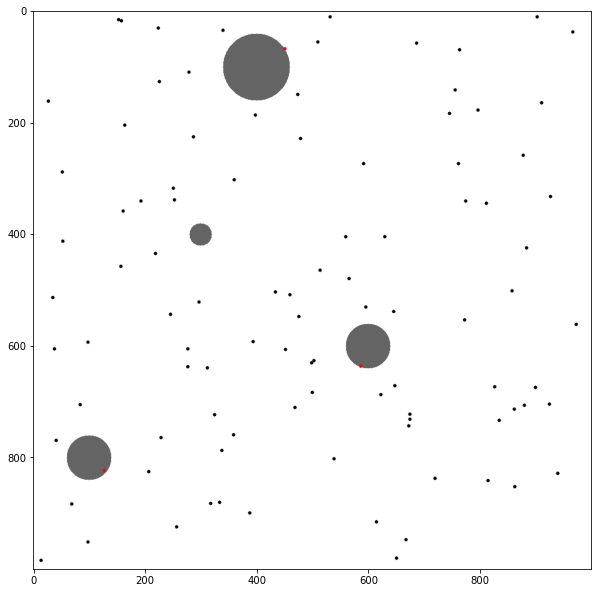

In [344]:
randomPoints = [(np.random.randint(10, 990), np.random.randint(10, 990)) for _ in range(numberOfNodes)]
listOfVertix = []
for i in range(0,numberOfNodes):
    v = vertex(x = randomPoints[i][0], y = randomPoints[i][1])
    if (doesConnect(json_list,v)):
        v.color = (255, 0, 0)   # Mark a red dot 
    else: 
        listOfVertix.append(v)
    # print(v.x)
    cv.circle(white_image, (v.x,v.y), 3, v.color, thickness=cv.FILLED)

#Show the image with matplotlib
plt.figure(figsize=(10, 15))
plt.imshow(white_image)
plt.show()

In [345]:
def findDistace (v1, v2):
    distance = math.sqrt((v1.x - v2.x)**2 + (v2.y - v1.y)**2)
    return distance

def findClosetVertex(exploredList, newVertex): 
    closestVertex = 0 
    distance = -1 
    for v in exploredList:
        calculatedDistance = findDistace(v,newVertex) 
        if distance == -1 or calculatedDistance < distance:
            closestVertex = v
    return closestVertex
def drawLine(v1,v2, color = (0,0,255)):
    cv.line(white_image, (v1.x,v1.y), (v2.x,v2.y), color, thickness=2)
    # white_image
    
        # Find shortest distance 

def findClosetNodeToGraph(exploredVertexList,listOfVertix):
    newConnection = 0 # This will be two different vertexes we will be returning
    smallestDistance = -1 
    for exploredV in exploredVertexList:
        for unexploredVertix in listOfVertix:
            calculateDistance = findDistace(exploredV,unexploredVertix)
            if smallestDistance == -1 or calculateDistance < smallestDistance:
                smallestDistance = calculateDistance
                newConnection = (exploredV,unexploredVertix)
    return newConnection

In [346]:
# Lets first pick some random point since we generated random points any point we pick will be random
counter = 0 
exploredVertexList = []
startVertex = listOfVertix.pop()


cv.circle(white_image, (startVertex.x,startVertex.y), 8, (255,0,255), thickness=cv.FILLED)

exploredVertexList.append(startVertex)

while(len(listOfVertix) > 0 ): 
    graphNode, newNode = findClosetNodeToGraph(exploredVertexList, listOfVertix)

    # if 
    while doesCircleLineIntersect(json_list, graphNode,newNode) :
        nodeIndex = listOfVertix.index(newNode)
        tempList = copy.deepcopy(listOfVertix)
        del tempList[nodeIndex]
        graphNode, newNode = findClosetNodeToGraph(exploredVertexList, tempList)
    
    drawLine(graphNode,newNode)
    exploredVertexList.append(newNode)
    listOfVertix.remove(newNode)
    counter +=1 
    if counter % 5 == 0: 
        cv.imwrite('saved_image ' +str(counter) + '.png', white_image)
    

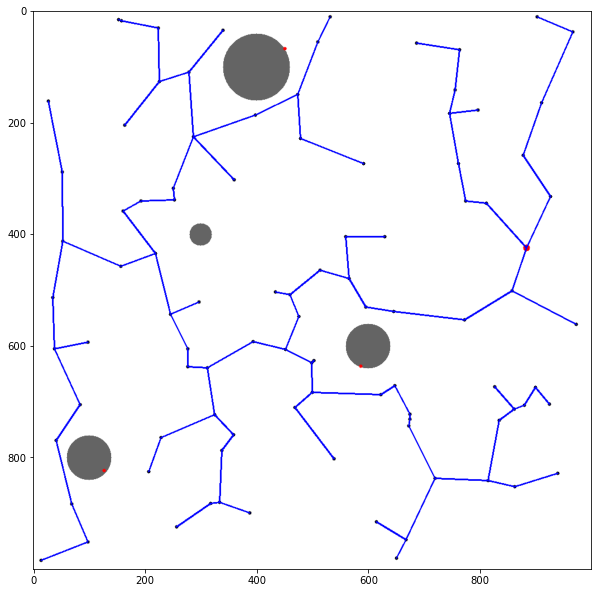

In [347]:
plt.figure(figsize=(10, 15))
plt.imshow(white_image)
plt.show()